<a href="https://colab.research.google.com/github/hairilhmm/12345/blob/main/klasifikasi_kawasan_pariwisata_gunung_dempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [9]:
filename = "translite_Kawasan_Wisata_Gunung_Dempo.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

ParserError: ignored

In [5]:
df.drop(columns = ['name'], inplace = True)
df.columns = ['rating', 'review']
df.head()

NameError: ignored

# **Preprocessing Data**


<h2>Cleaning the text</h2>

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

<h2>Adding additional features - length of, and percentage of punctuations in the text</h2>

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['Review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

,rating,review,cleaned_text,label,Review_len,punct
0,5.0,"The hotel is good, it's a bit far from the cit...",the hotel is good it s a bit far from the cit...,1,187,5.9
1,5.0,Those who go to Pagaralam must try to stay at ...,those who go to pagaralam must try to stay at ...,1,113,3.5
2,5.0,The vibe of the hotel is really vintage but it...,the vibe of the hotel is really vintage but it...,1,76,2.6
3,5.0,"Strategic location, affordable prices, satisfy...",strategic location affordable prices satisfy...,1,55,9.1
4,5.0,"Strategic location, but needs a lot of design ...",strategic location but needs a lot of design ...,1,136,2.2


<h2>Tokenization</h2>

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,rating,review,cleaned_text,label,Review_len,punct,tokens
0,5.0,"The hotel is good, it's a bit far from the cit...",the hotel is good it s a bit far from the cit...,1,187,5.9,"[the, hotel, is, good, it, s, a, bit, far, fro..."
1,5.0,Those who go to Pagaralam must try to stay at ...,those who go to pagaralam must try to stay at ...,1,113,3.5,"[those, who, go, to, pagaralam, must, try, to,..."
2,5.0,The vibe of the hotel is really vintage but it...,the vibe of the hotel is really vintage but it...,1,76,2.6,"[the, vibe, of, the, hotel, is, really, vintag..."
3,5.0,"Strategic location, affordable prices, satisfy...",strategic location affordable prices satisfy...,1,55,9.1,"[strategic, location, affordable, prices, sati..."
4,5.0,"Strategic location, but needs a lot of design ...",strategic location but needs a lot of design ...,1,136,2.2,"[strategic, location, but, needs, a, lot, of, ..."


<h2>Lemmatization and Removing Stopwords</h2>

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,rating,review,cleaned_text,label,Review_len,punct,tokens,lemmatized_review
0,5.0,"The hotel is good, it's a bit far from the cit...",the hotel is good it s a bit far from the cit...,1,187,5.9,"[the, hotel, is, good, it, s, a, bit, far, fro...",hotel good bit far city clean unfortunately wa...
1,5.0,Those who go to Pagaralam must try to stay at ...,those who go to pagaralam must try to stay at ...,1,113,3.5,"[those, who, go, to, pagaralam, must, try, to,...",go pagaralam must try stay hotel recommended p...
2,5.0,The vibe of the hotel is really vintage but it...,the vibe of the hotel is really vintage but it...,1,76,2.6,"[the, vibe, of, the, hotel, is, really, vintag...",vibe hotel really vintage like homestay comfor...
3,5.0,"Strategic location, affordable prices, satisfy...",strategic location affordable prices satisfy...,1,55,9.1,"[strategic, location, affordable, prices, sati...",strategic location affordable price satisfying...
4,5.0,"Strategic location, but needs a lot of design ...",strategic location but needs a lot of design ...,1,136,2.2,"[strategic, location, but, needs, a, lot, of, ...",strategic location need lot design improvement...


# **EDA**

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['rating']==5.0])} rows")

Input data has 131 rows and 8 columns
rating 1.0 = 9 rows
rating 2.0 = 5 rows
rating 3.0 = 22 rows
rating 4.0 = 15 rows
rating 5.0 = 80 rows


Number of null in label: 0
Number of null in text: 0


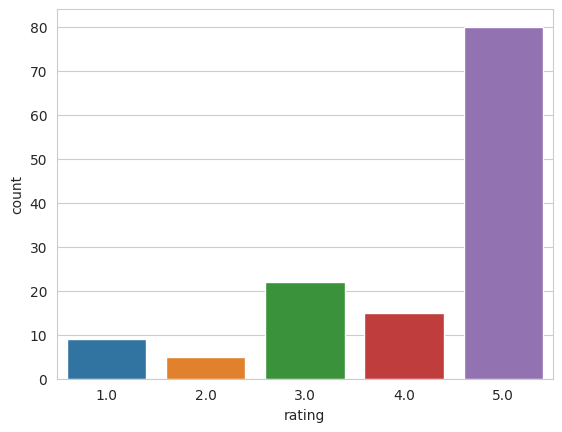

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum()}")
sns.countplot(x='rating', data=df);

# **Visualizing Word Clouds**

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0)]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

<h3><b>Word Cloud</b>: Positive Reviews</h3>

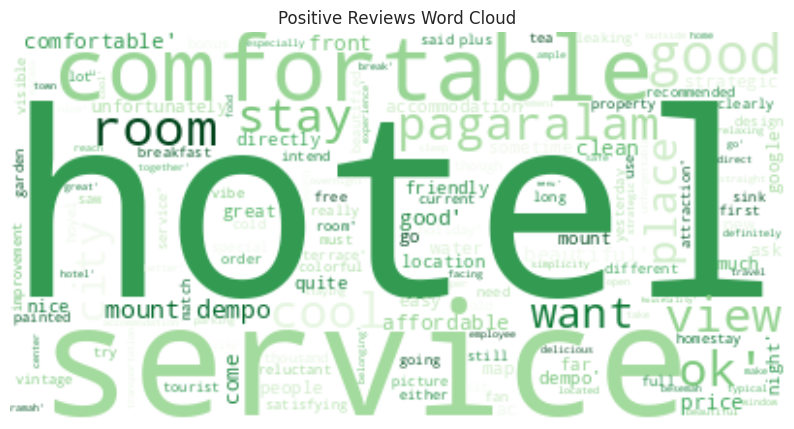

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

<h3><b>Word Cloud</b>: Negative Reviews</h3>

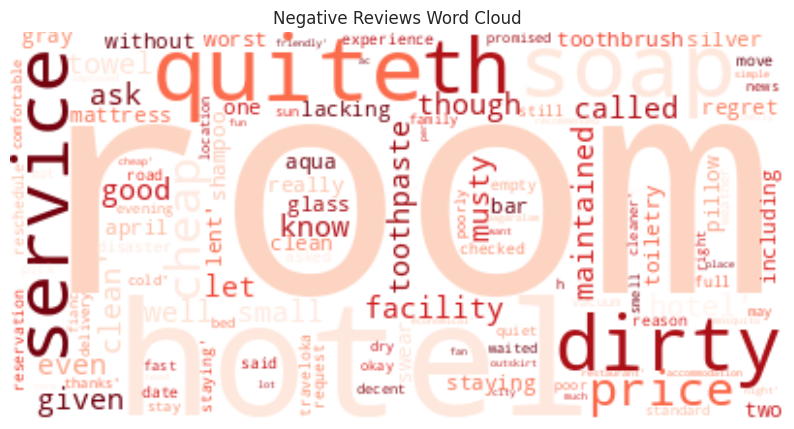

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# **Feature Extraction from Text**

*   Vectorizer : TF-IDF

In [ ]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(131, 3)
(131,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 3)
(40, 3)
(91,)
(40,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,55,9.1,0.0,0.0,0.477593,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.477593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430768,0.000000,0.0,0.000000,0.360767,0.000000,0.0,0.477593,0.0,0.0,0.0,0.0,0.0
1,8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,149,4.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.440272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.440272,0.0,0.341752,0.000000,0.497758,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,15,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# **Visualize Confusion Matrix**
*   Vectorizer : TF-IDF

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h3><u>Algoritma</u> : Multinomial Naive Bayes</h3>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.77      0.97      0.86        31

    accuracy                           0.75        40
   macro avg       0.38      0.48      0.43        40
weighted avg       0.60      0.75      0.66        40



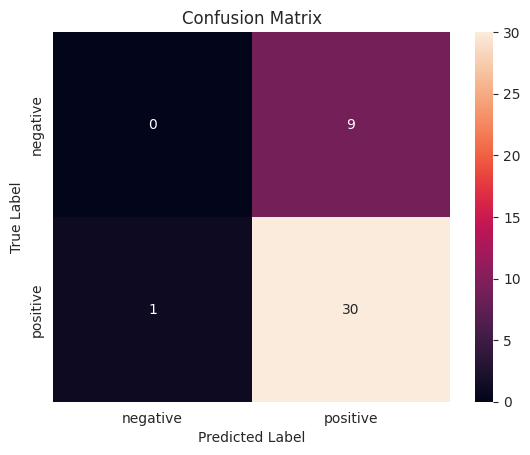

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(tfidf_train, y_train)
naive_bayes_pred = classifier.predict(tfidf_test)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Performing K-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

NameError: ignored

# **Predictions**


*   <u>Vectorizer</u> : CountVectorizer (Bag of words)
*   <u>Algoritma</u>  : Multinomial Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.775

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]








---

*   <u>Vectorizer</u>: TF-IDF
*   <u>Algoritma</u>: Extra Trees Classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.825

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]
